In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import sys
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from lightning.classification import FistaClassifier

%matplotlib inline 

In [194]:
df = pd.read_csv('data.csv')
df.drop('id',axis=1,inplace=True) #dropping the 'id' column
df.drop('Unnamed: 32',axis=1,inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [195]:
#df.info()

diagnosis
0    357
1    212
dtype: int64


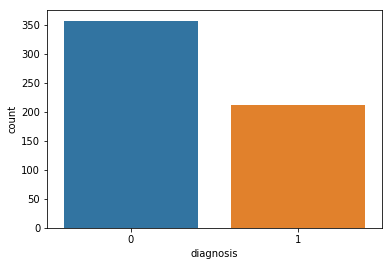

In [196]:
print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

In [197]:
test_per = int(len(df.index)*0.9) #actual is 0.1-0.9
print("test size:", int(len(df.index)- test_per))
testdf = df[test_per:]
df = df[:test_per]
df.shape
print(df.groupby('diagnosis').size())

test size: 57
diagnosis
0    314
1    198
dtype: int64


In [198]:
def add_labelnoise(noise_level, seed=None):
    np.random.seed(seed) 
   # train_p = int(noise_level * len(traindf.index))
   # validate_p = int(noise_level * len(valdf.index)) 
   # x = np.random.randint(low = 0, high = len(traindf)-train_p)
  #  y = np.random.randint(low = 0, high = len(valdf)-validate_p)
   # print(y)
    l = int(noise_level*len(df.index))
    for i in range(l):
        if df['diagnosis'][i]==1:
            df['diagnosis'][i]=0
        elif df['diagnosis'][i]==0:
            df['diagnosis'][i]=1
      
        
    #return traindf, valdf

#t.head(20)
#t['Outcome'][:10]

add_labelnoise(0.30)
df.head()

c:\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [199]:
print(df.groupby('diagnosis').size())

diagnosis
0    327
1    185
dtype: int64


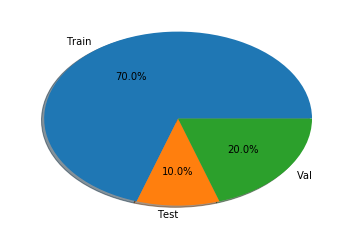

Train set (409, 31)
Test set (57, 31)
Validation set (103, 31)
diagnosis
0    253
1    156
dtype: int64


In [200]:
#split our data into train and test
#traindf, testdf = train_test_split(df, test_size = 0.3)
#traindf, valdf, testdf = train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None)
traindf, valdf = train_test_split(df, test_size = 0.2)
labels = 'Train', 'Test', 'Val'
plt.pie([70, 10, 20], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)
print("Validation set", valdf.shape)

print(traindf.groupby('diagnosis').size())

In [201]:
train_X=traindf[traindf.columns[1:]]
val_X=valdf[testdf.columns[1:]]
train_Y=traindf['diagnosis']
val_Y=valdf['diagnosis']
test_X=testdf[testdf.columns[1:]]
test_Y=testdf['diagnosis']

In [204]:
X = train_X
y = train_Y
clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.9298245614035088
Cross_val score : 0.77593984962406


In [210]:
clf = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.7543859649122807
Cross_val score : 0.7568922305764412


In [265]:
clf = SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.8070175438596491
Cross_val score : 0.718796992481203


In [266]:
clf = SGDClassifier(loss='squared_hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.9122807017543859
Cross_val score : 0.7187969924812031


In [249]:
clf = SGDClassifier(loss='modified_huber', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.8070175438596491
Cross_val score : 0.6225563909774436


## FISTA

In [251]:


# Set classifier options.
clf = FistaClassifier(C=1.0, alpha=1.0, loss='squared_hinge', penalty='l1',
                      multiclass=True, max_iter=1000, max_steps=30, eta=2.0,
                      sigma=1e-05, callback=None, verbose=0  )

# Train the model.
clf.fit(X, y)


# Accuracy
print("Accuracy :", clf.score(test_X, test_Y))

# Percentage of selected features
print(clf.n_nonzero(percentage=True))

scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.7543859649122807
1.0


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Cross_val score : 0.718796992481203


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
